#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터
- id : 1번 ~ 100번 일련번호
- gender : 0,1 정수 난수 생성
- age : 10 ~ 80사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region : 1 ~ 5 사이 정수 난수 생성

거래 데이터
- id : 1번 ~ 100번 일련번호(관측치 1000개)
- product : 고급제품(hpd), 일반제품(lpd)로 구분
- price : 100 ~ 200 사이 정수 난수 생성
- qty : 1 ~ 2 사이 정수 난수 생성
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount : price * qty로 산출 

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [2]:
# 고객 속성 데이터 생성
import numpy as np
import pandas as pd
np.random.seed(0)
no = np.arange(1,101)
i1 = pd.Series(no)
gender = np.random.randint(2,size=100)
g1 = pd.Series(gender)
age=np.random.randint(10,81,size=100)
a1 = pd.Series(age)
region = np.random.randint(1,6,size=100)
r1 = pd.Series(region)
df1 = pd.concat([i1,g1,a1,r1],axis=1)
df1.rename(columns={0:'no',1:'gender',2:'age',3:'region'},inplace=True)
df1.head()

,no,gender,age,region
0,1,0,52,4
1,2,1,78,3
2,3,1,16,4
3,4,0,78,3
4,5,1,57,5


In [4]:
# age를 구매력을 고려하여 age_cat로 범주화
def age_cat(x):
    cat=''
    if x < 20:
        cat = 1
    elif x < 30:
        cat = 2
    elif x < 40:
        cat = 3
    elif x < 50:
        cat = 4
    elif x < 60:
        cat = 5
    else:
        cat = 6
    return cat
df1['age_cat'] = df1.age.apply(lambda x : age_cat(x))
df1.drop('age',axis=1,inplace=True)
df1.head()

,no,gender,region,age_cat
0,1,0,4,5
1,2,1,3,6
2,3,1,4,1
3,4,0,3,6
4,5,1,5,5


In [5]:
data = np.zeros((1000,6))
df2 = pd.DataFrame(data,columns=['no','product','price','qty','day','date'])
df2.head()

,no,product,price,qty,day,date
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
np.random.seed(1)
df2['no'] = np.random.randint(1,101,1000)
df2['product'] = np.random.randint(1,3,1000)
df2['price'] = np.random.randint(100,200,1000)
df2['qty'] = np.random.randint(1,3,1000)
df2['day'] = np.random.choice(['MON','TUE','WED','THU','FRI','SAT','SUN'],1000)
df2['date'] = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
df2['year'] = df2.date.dt.year
df2 = df2.drop('date',axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,159,2,SAT,2020
1,13,1,117,2,TUE,2020
2,73,1,122,2,SAT,2020
3,10,2,154,2,FRI,2020
4,76,2,113,2,SUN,2020


In [10]:
# df2.shape
# df2.info()
df2.describe()

,no,product,price,qty,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.074000,1.484000,150.938000,1.529000,2020.499000
std,28.805317,0.499994,29.085187,0.499408,0.500249
min,1.000000,1.000000,100.000000,1.000000,2020.000000
25%,26.000000,1.000000,126.000000,1.000000,2020.000000
50%,49.000000,1.000000,152.000000,2.000000,2020.000000
75%,76.000000,2.000000,177.000000,2.000000,2021.000000
max,100.000000,2.000000,199.000000,2.000000,2021.000000


In [11]:
# product 1 고가 ~ 2 저가
def pddiff(product, price):
    if product == 1:
        return price * 20
    else:
        return price * 10
    
df2['price'] = df2.apply(lambda x : pddiff(x['product'],x['price']),axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,1590,2,SAT,2020
1,13,1,2340,2,TUE,2020
2,73,1,2440,2,SAT,2020
3,10,2,1540,2,FRI,2020
4,76,2,1130,2,SUN,2020


In [13]:
# quantiry 1 소량 ~ 2 대량
def qtydiff(product,qty):
    if product == 2:
        return qty * 10
    else:
        return qty
df2['qty'] = df2.apply(lambda x : qtydiff(x['product'],x['qty']),axis=1)
df2.head()

,no,product,price,qty,day,year
0,38,2,1590,20,SAT,2020
1,13,1,2340,2,TUE,2020
2,73,1,2440,2,SAT,2020
3,10,2,1540,20,FRI,2020
4,76,2,1130,20,SUN,2020


In [14]:
df2['amount'] = df2.qty * df2.price
df2.head()

,no,product,price,qty,day,year,amount
0,38,2,1590,20,SAT,2020,31800
1,13,1,2340,2,TUE,2020,4680
2,73,1,2440,2,SAT,2020,4880
3,10,2,1540,20,FRI,2020,30800
4,76,2,1130,20,SUN,2020,22600


In [15]:
pdf = df2.copy()
pdf = pdf.drop(['price','qty'],axis=1)
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       1000 non-null   int32 
 1   product  1000 non-null   int32 
 2   day      1000 non-null   object
 3   year     1000 non-null   int64 
 4   amount   1000 non-null   int64 
dtypes: int32(2), int64(2), object(1)
memory usage: 31.4+ KB


In [16]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1214220
         2021    1248000
2        2020    5539000
         2021    5278000
Name: amount, dtype: int64

In [17]:
# 인사이트 삽입
# 코로나로 고급품의 매출은 유지된 반면 생활용품 위주로 판매 급감
def pdcut(year,product,amount):
    if (year==2021) & (product==2):
        return amount * 0.5
    else:
        return amount
pdf['amount'] = pdf.apply(lambda x : pdcut(x['year'],x['product'],x['amount']),axis=1)
pdf.head()

,no,product,day,year,amount
0,38,2,SAT,2020,31800.0
1,13,1,TUE,2020,4680.0
2,73,1,SAT,2020,4880.0
3,10,2,FRI,2020,30800.0
4,76,2,SUN,2020,22600.0


In [18]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
1        2020    1214220.0
         2021    1248000.0
2        2020    5539000.0
         2021    2639000.0
Name: amount, dtype: float64

In [19]:
pdf.head()

,no,product,day,year,amount
0,38,2,SAT,2020,31800.0
1,13,1,TUE,2020,4680.0
2,73,1,SAT,2020,4880.0
3,10,2,FRI,2020,30800.0
4,76,2,SUN,2020,22600.0


In [20]:
# 고객별 구매상품별 연간 구매금액 변동율 산출
pdf['yp'] = pdf[['year','product']].astype(str).apply('_'.join,axis=1)
pdf.head()

,no,product,day,year,amount,yp
0,38,2,SAT,2020,31800.0,2020_2
1,13,1,TUE,2020,4680.0,2020_1
2,73,1,SAT,2020,4880.0,2020_1
3,10,2,FRI,2020,30800.0,2020_2
4,76,2,SUN,2020,22600.0,2020_2


In [22]:
pdf1 = pd.pivot_table(pdf,
                     index = 'no',
                     columns= 'yp',
                     values = 'amount',
                     aggfunc = 'sum')
pdf1.head()

yp,2020_1,2020_2,2021_1,2021_2
no,,,,
1,7400.0,79000.0,17520.0,29400.0
2,5000.0,17100.0,30400.0,42550.0
3,6580.0,113000.0,5120.0,6050.0
4,13700.0,49200.0,16080.0,16350.0
5,NaN,NaN,9380.0,40650.0


In [23]:
pdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020_1  92 non-null     float64
 1   2020_2  92 non-null     float64
 2   2021_1  98 non-null     float64
 3   2021_2  89 non-null     float64
dtypes: float64(4)
memory usage: 3.9 KB


In [24]:
pdf1['2020_1'].fillna(pdf1['2020_1'].mean(),inplace=True)
pdf1['2020_2'].fillna(pdf1['2020_2'].mean(),inplace=True)
pdf1['2021_1'].fillna(pdf1['2021_1'].mean(),inplace=True)
pdf1['2021_2'].fillna(pdf1['2021_2'].mean(),inplace=True)
pdf1.columns.name = None
pdf1.reset_index(inplace=True)
pdf1.head()

,no,2020_1,2020_2,2021_1,2021_2
0,1,7400.000000,79000.000000,17520.0,29400.0
1,2,5000.000000,17100.000000,30400.0,42550.0
2,3,6580.000000,113000.000000,5120.0,6050.0
3,4,13700.000000,49200.000000,16080.0,16350.0
4,5,13198.043478,60206.521739,9380.0,40650.0


In [25]:
pdf1['2020_1'] = (pdf1['2020_1']/pdf1['2020_1'].sum()) * 100
pdf1['2020_2'] = (pdf1['2020_2']/pdf1['2020_2'].sum()) * 100
pdf1['2021_1'] = (pdf1['2021_1']/pdf1['2021_1'].sum()) * 100
pdf1['2021_2'] = (pdf1['2021_2']/pdf1['2021_2'].sum()) * 100
pdf1.head()

,no,2020_1,2020_2,2021_1,2021_2
0,1,0.560689,1.312150,1.375769,0.991512
1,2,0.378844,0.284022,2.387179,1.434994
2,3,0.498559,1.876873,0.402051,0.204036
3,4,1.038033,0.817187,1.262692,0.551402
4,5,1.000000,1.000000,0.736571,1.370917


In [26]:
pdf1['hpd'] = (pdf1['2021_1'] - pdf1['2020_1'])/pdf1['2020_1']
pdf1['lpd'] = (pdf1['2021_2'] - pdf1['2020_2'])/pdf1['2020_2']
pdf2 = pdf1[['no','hpd','lpd']]
pdf2.head()

,no,hpd,lpd
0,1,1.453711,-0.244361
1,2,5.301220,4.052399
2,3,-0.193573,-0.891290
3,4,0.216428,-0.325244
4,5,-0.263429,0.370917


In [27]:
df = pd.merge(df1,pdf2,on='no',how='outer')
df.head()

,no,gender,region,age_cat,hpd,lpd
0,1,0,4,5,1.453711,-0.244361
1,2,1,3,6,5.301220,4.052399
2,3,1,4,1,-0.193573,-0.891290
3,4,0,3,6,0.216428,-0.325244
4,5,1,5,5,-0.263429,0.370917


In [28]:
pdf.head()

,no,product,day,year,amount,yp
0,38,2,SAT,2020,31800.0,2020_2
1,13,1,TUE,2020,4680.0,2020_1
2,73,1,SAT,2020,4880.0,2020_1
3,10,2,FRI,2020,30800.0,2020_2
4,76,2,SUN,2020,22600.0,2020_2


In [29]:
# 종속변수 정의
df_y = pdf[['no','year','amount']]
pvt = pd.pivot_table(df_y,
                    index='no',
                    columns='year',
                    values='amount',
                    aggfunc='sum')
pvt = pvt.reset_index()
pvt.columns.name=None
pvt.head()

,no,2020,2021
0,1,86400.0,46920.0
1,2,22100.0,72950.0
2,3,119580.0,11170.0
3,4,62900.0,32430.0
4,5,NaN,50030.0


In [30]:
pvt[2020].fillna(pvt[2020].mean(),inplace=True)
pvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      100 non-null    int64  
 1   2020    100 non-null    float64
 2   2021    100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [31]:
df = pd.merge(df,pvt,on='no',how='outer')
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021
0,1,0,4,5,1.453711,-0.244361,86400.000000,46920.0
1,2,1,3,6,5.301220,4.052399,22100.000000,72950.0
2,3,1,4,1,-0.193573,-0.891290,119580.000000,11170.0
3,4,0,3,6,0.216428,-0.325244,62900.000000,32430.0
4,5,1,5,5,-0.263429,0.370917,68910.408163,50030.0


In [32]:
df['ratio'] = (df[2021]-df[2020])/df[2020]
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021,ratio
0,1,0,4,5,1.453711,-0.244361,86400.000000,46920.0,-0.456944
1,2,1,3,6,5.301220,4.052399,22100.000000,72950.0,2.300905
2,3,1,4,1,-0.193573,-0.891290,119580.000000,11170.0,-0.906590
3,4,0,3,6,0.216428,-0.325244,62900.000000,32430.0,-0.484420
4,5,1,5,5,-0.263429,0.370917,68910.408163,50030.0,-0.273985


In [33]:
# 고객별 구매증감율 예측 모델을 위한 분석용 데이터셋
df1 = df.drop([2020,2021],axis=1)
df1.head()

,no,gender,region,age_cat,hpd,lpd,ratio
0,1,0,4,5,1.453711,-0.244361,-0.456944
1,2,1,3,6,5.301220,4.052399,2.300905
2,3,1,4,1,-0.193573,-0.891290,-0.906590
3,4,0,3,6,0.216428,-0.325244,-0.484420
4,5,1,5,5,-0.263429,0.370917,-0.273985


In [41]:
# 인사이트 탐색:
# 일반제품의 변화율인 lpd 컬럼과 구매증감율 ratio의 상관관계가 0.5 초과
df1[['hpd','lpd','ratio']].corr()

,hpd,lpd,ratio
hpd,1.000000,0.142194,0.221659
lpd,0.142194,1.000000,0.556799
ratio,0.221659,0.556799,1.000000


<AxesSubplot:xlabel='hpd', ylabel='ratio'>

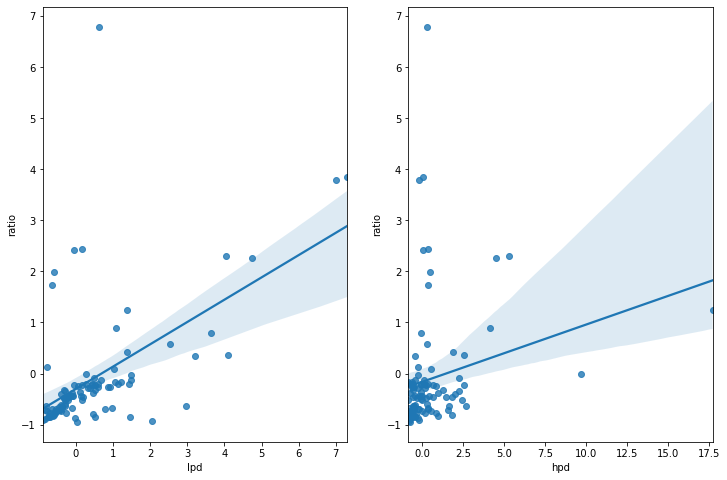

In [49]:
# 인사이트 시각적 탐색
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='lpd',y='ratio',data=df1,fit_reg=True,ax=ax1)
sns.regplot(x='hpd',y='ratio',data=df1,fit_reg=True,ax=ax2)

In [53]:
df1.head()

,no,gender,region,age_cat,hpd,lpd,ratio
0,1,0,4,5,1.453711,-0.244361,-0.456944
1,2,1,3,6,5.301220,4.052399,2.300905
2,3,1,4,1,-0.193573,-0.891290,-0.906590
3,4,0,3,6,0.216428,-0.325244,-0.484420
4,5,1,5,5,-0.263429,0.370917,-0.273985


In [54]:
X = df1.drop(['no','ratio'],axis=1)
y = df1['ratio']

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=11) #랜덤 추출 값 

# 단순회귀분석 모형 생성 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{0:.4f}, RMSE:{1:.4f}, R2:{2:.4f}'.format(mse,rmse,r2))

MSE:0.3905, RMSE:0.6249, R2:0.6555


In [55]:
# 회귀식의 기울기
print(lr.coef_)
# 회귀식의 절편
print(lr.intercept_)

[-0.09882559 -0.20204968  0.04210592  0.08736608  0.33975257]
0.2126882227587619


In [36]:
# 구매감소 고객 예측 모델을 위한 데이터셋 구축
def mklable(a,b):
    if b>=a:
        return 1
    else:
        return 0
df['target'] = df.apply(lambda x : mklable(x[2020],x[2021]),axis=1)
df.head()

,no,gender,region,age_cat,hpd,lpd,2020,2021,ratio,target
0,1,0,4,5,1.453711,-0.244361,86400.000000,46920.0,-0.456944,0
1,2,1,3,6,5.301220,4.052399,22100.000000,72950.0,2.300905,1
2,3,1,4,1,-0.193573,-0.891290,119580.000000,11170.0,-0.906590,0
3,4,0,3,6,0.216428,-0.325244,62900.000000,32430.0,-0.484420,0
4,5,1,5,5,-0.263429,0.370917,68910.408163,50030.0,-0.273985,0


In [37]:
y = df['target']
X = df.drop(['no',2020,2021,'ratio','target'],axis=1)

In [38]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 11)
print(X_train.shape)
print(X_test.shape)

(80, 5)
(20, 5)


In [39]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.85, lr 정확도:0.95
